# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [ ]:
import pandas as pd

## imports for Python, Pandas

In [ ]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [ ]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [ ]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

In [ ]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [ ]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

In [ ]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
#importing the data frame
df= pd.read_json('data/world_bank_projects.json')

In [ ]:
#gaining knowledge about the data frame.
df.info()

In [ ]:
#exlporing the first few rows of the data frame
df.head()

In [ ]:
#filling all the missing values(irresptective of their data type to NaN)
df.fillna(np.NaN)

1. Find the 10 countries with most projects

In [112]:
# finding the frequency of each country in the data frame by the 'countryname' column
# and printing the top 10 values (0-9) from it.
top_10_countries=df['countryname'].value_counts()[0:10]
print(top_10_countries)

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Nepal                              12
Kingdom of Morocco                 12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64


Text(0.5, 1.0, '10 countries with most projects')

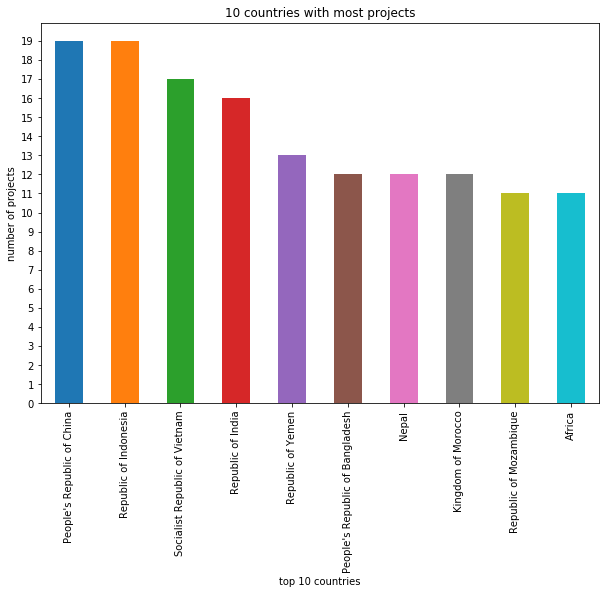

In [113]:
#plotting a bar chart with countries on x-axis and no. of projects on y-axis
bar_chart=top_10_countries.plot(kind='bar',figsize=(10,7) ,yticks=(np.arange(0, 20, step=1)))
bar_chart.set_xlabel("top 10 countries")
bar_chart.set_ylabel("number of projects")
bar_chart.set_title("10 countries with most projects")

2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [114]:
top_10_project_themes=df['mjtheme_namecode'].value_counts()[0:10].reset_index()
top_10_project_themes.columns=['project_theme', 'count']

In [115]:
top_10_project_themes

,project_theme,count
0,"[{'code': '11', 'name': 'Environment and natur...",12
1,"[{'code': '8', 'name': 'Human development'}, {...",11
2,"[{'code': '8', 'name': 'Human development'}, {...",8
3,"[{'code': '4', 'name': 'Financial and private ...",6
4,"[{'code': '2', 'name': 'Public sector governan...",6
5,"[{'code': '8', 'name': 'Human development'}, {...",5
6,"[{'code': '8', 'name': 'Human development'}, {...",5
7,"[{'code': '11', 'name': 'Environment and natur...",5
8,"[{'code': '11', 'name': 'Environment and natur...",5
9,"[{'code': '4', 'name': 'Financial and private ...",5


3.you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [116]:
#creating a dictionary with codes as keys and value as the project theme(this is required to fill in
# the missing the names)
code_to_name_dict={}
for i in list(top_10_project_themes['project_theme']):
    for d in i:
        if code_to_name_dict.get(d['code']) is None:
            code_to_name_dict[d['code']] = d['name']

In [117]:
#filling in the missing values according to their code
for theme in top_10_project_themes['project_theme']:
    for code_name_dic in theme:
        if code_name_dic['name'] == '':
            code_name_dic['name'] = code_to_name_dict[code_name_dic['code']]

In [118]:
#new dataframe with missing values filled in
top_10_project_themes

,project_theme,count
0,"[{'code': '11', 'name': 'Environment and natur...",12
1,"[{'code': '8', 'name': 'Human development'}, {...",11
2,"[{'code': '8', 'name': 'Human development'}, {...",8
3,"[{'code': '4', 'name': 'Financial and private ...",6
4,"[{'code': '2', 'name': 'Public sector governan...",6
5,"[{'code': '8', 'name': 'Human development'}, {...",5
6,"[{'code': '8', 'name': 'Human development'}, {...",5
7,"[{'code': '11', 'name': 'Environment and natur...",5
8,"[{'code': '11', 'name': 'Environment and natur...",5
9,"[{'code': '4', 'name': 'Financial and private ...",5


Text(0.5, 1.0, 'top 10 project themes')

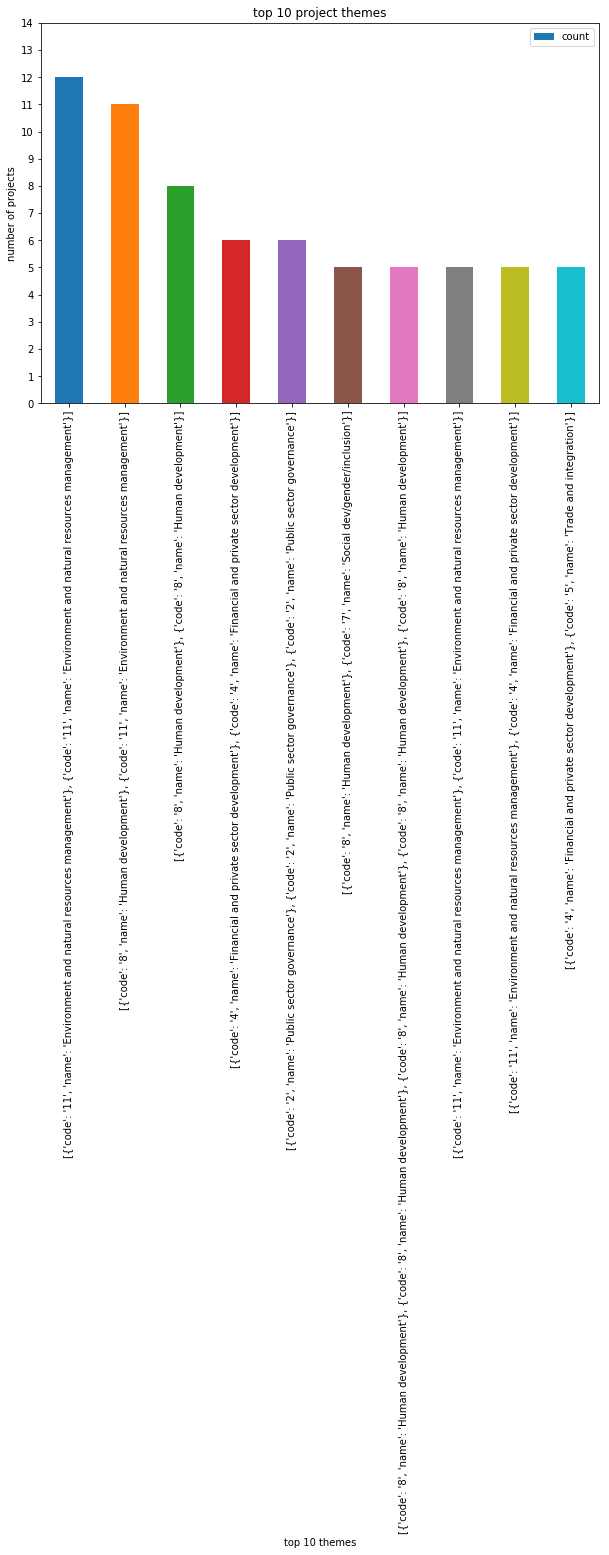

In [119]:
#plotting a bar chart with project themes on x-axis and their count on y-axis
bar_chart=top_10_project_themes.plot(kind='bar',x='project_theme', y='count', figsize=(10,7) ,yticks=(np.arange(0, 15, step=1)))
bar_chart.set_xlabel("top 10 themes")
bar_chart.set_ylabel("number of projects")
bar_chart.set_title("top 10 project themes")